In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
from google.colab import files
uploaded = files.upload()

Saving IBM Dataset.csv to IBM Dataset (2).csv


In [25]:
data = pd.read_csv('IBM Dataset.csv')

In [26]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [29]:
data.duplicated().sum()

0

In [30]:
data.drop(["EmployeeCount","StandardHours","EmployeeNumber","Over18"],axis=1,inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [31]:
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()

In [32]:
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = encoded.fit_transform(data[column])

In [33]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [36]:
np.max(data , axis=0)

,0
Age,60
Attrition,1
BusinessTravel,2
DailyRate,1499
Department,2
DistanceFromHome,29
Education,5
EducationField,5
EnvironmentSatisfaction,4
Gender,1


In [37]:
np.min(data , axis=0)

,0
Age,18
Attrition,0
BusinessTravel,0
DailyRate,102
Department,0
DistanceFromHome,1
Education,1
EducationField,0
EnvironmentSatisfaction,1
Gender,0


In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [39]:
min_max_scaler_data = min_max_scaler.fit_transform(data)

In [40]:
data = pd.DataFrame(min_max_scaler_data, columns = data.columns)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.5,0.559771,0.5,0.785714,0.25,0.6,0.666667,1.0,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.0,1.0,0.365784,0.5,0.178571,0.00,0.6,1.000000,1.0,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.0,1.0,0.037938,0.5,0.107143,0.50,0.2,0.333333,1.0,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.0,0.5,0.659270,1.0,0.035714,0.50,0.6,1.000000,1.0,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [43]:
x = data.drop('Attrition', axis=1)
y = data['Attrition']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split ( x , y , test_size=0.3)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [47]:
model = KNeighborsClassifier()
params = {
    'n_neighbors' : list(range(1,25)),
    'p' : [1,2],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [48]:
from sklearn.model_selection import GridSearchCV
gs_model = GridSearchCV(model, params)
gs_model.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [51]:
gs_model.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [53]:
model = KNeighborsClassifier(n_neighbors = 10 , p = 1 , weights = 'distance' , metric = 'minkowski' , algorithm = 'auto')
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [58]:
y_pred = model.predict(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       366
         1.0       0.67      0.08      0.14        75

    accuracy                           0.84       441
   macro avg       0.75      0.54      0.53       441
weighted avg       0.81      0.84      0.78       441



<Axes: >

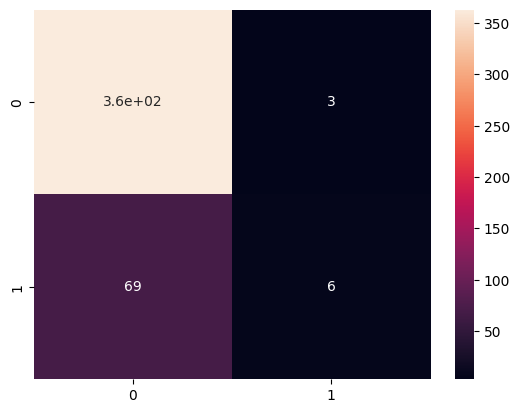

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

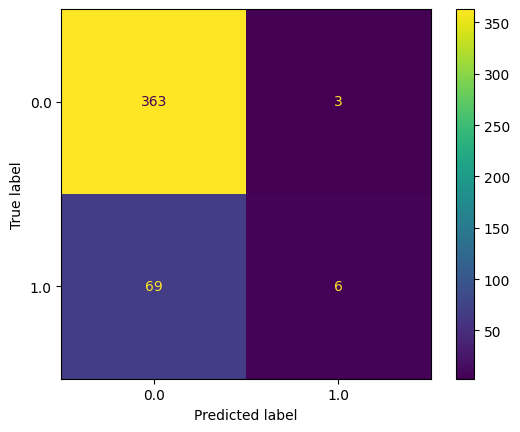

In [61]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cm_plot.plot()